There are n 1-indexed robots, each having a position on a line, health, and movement direction.

You are given 0-indexed integer arrays positions, healths, and a string directions (directions[i] is either 'L' for left or 'R' for right). All integers in positions are unique.

All robots start moving on the line simultaneously at the same speed in their given directions. If two robots ever share the same position while moving, they will collide.

If two robots collide, the robot with lower health is removed from the line, and the health of the other robot decreases by one. The surviving robot continues in the same direction it was going. If both robots have the same health, they are both removed from the line.

Your task is to determine the health of the robots that survive the collisions, in the same order that the robots were given, i.e. final heath of robot 1 (if survived), final health of robot 2 (if survived), and so on. If there are no survivors, return an empty array.

Return an array containing the health of the remaining robots (in the order they were given in the input), after no further collisions can occur.

Note: The positions may be unsorted.
 

 

Example 1:

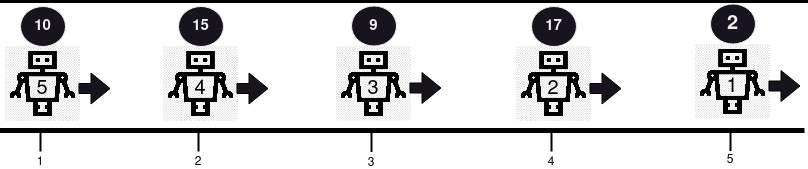

Input: positions = [5,4,3,2,1], healths = [2,17,9,15,10], directions = "RRRRR"
Output: [2,17,9,15,10]
Explanation: No collision occurs in this example, since all robots are moving in the same direction. So, the health of the robots in order from the first robot is returned, [2, 17, 9, 15, 10].

Example 2:

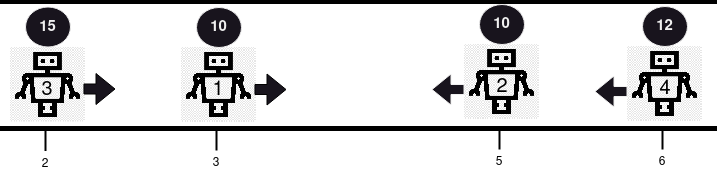

Input: positions = [3,5,2,6], healths = [10,10,15,12], directions = "RLRL"
Output: [14]
Explanation: There are 2 collisions in this example. Firstly, robot 1 and robot 2 will collide, and since both have the same health, they will be removed from the line. Next, robot 3 and robot 4 will collide and since robot 4's health is smaller, it gets removed, and robot 3's health becomes 15 - 1 = 14. Only robot 3 remains, so we return [14].

Example 3:

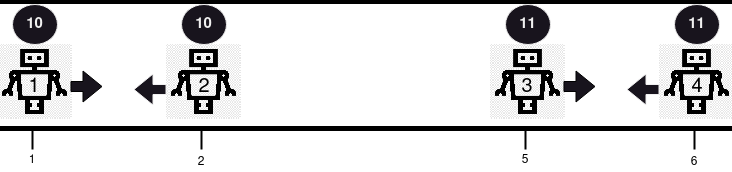

Input: positions = [1,2,5,6], healths = [10,10,11,11], directions = "RLRL"
Output: []
Explanation: Robot 1 and robot 2 will collide and since both have the same health, they are both removed. Robot 3 and 4 will collide and since both have the same health, they are both removed. So, we return an empty array, [].

 

Constraints:

    1 <= positions.length == healths.length == directions.length == n <= 105
    1 <= positions[i], healths[i] <= 109
    directions[i] == 'L' or directions[i] == 'R'
    All values in positions are distinct



In [ ]:
class Solution:
    def survivedRobotsHealths(self, positions: List[int], healths: List[int], directions: str) -> List[int]:
        n = len(positions)
        indices = list(range(n))
        result = []
        stack = deque()

        # Sort indices based on their positions
        indices.sort(key=lambda x: positions[x])

        for current_index in indices:
            # Add right-moving robots to the stack
            if directions[current_index] == "R":
                stack.append(current_index)
            else:
                while stack and healths[current_index] > 0:
                    # Pop the top robot from the stack for collision check
                    top_index = stack.pop()

                    if healths[top_index] > healths[current_index]:
                        # Top robot survives, current robot is destroyed
                        healths[top_index] -= 1
                        healths[current_index] = 0
                        stack.append(top_index)
                    elif healths[top_index] < healths[current_index]:
                        # Current robot survives, top robot is destroyed
                        healths[current_index] -= 1
                        healths[top_index] = 0
                    else:
                        # Both robots are destroyed
                        healths[current_index] = 0
                        healths[top_index] = 0

        # Collect surviving robots
        for index in range(n):
            if healths[index] > 0:
                result.append(healths[index])

        return result